# Design of a neural network for recognizing people's emotions from photos
## Based on data from the FER2013 dataset

## Construction of a neural network - with all classes of emotions on the RGB scale

### Import of libraries needed in the project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import cv2
import PIL.Image as Image

from sklearn.model_selection import train_test_split

### View data and prepare it for the model

In [2]:
model_loss, model_acc = [], []

In [3]:
dataset_dir_train = pathlib.Path('train')
train_ds = list(dataset_dir_train.glob('*/*.jpg'))
len(train_ds)

28709

In [4]:
dataset_dir_test = pathlib.Path('test')
test_ds = list(dataset_dir_test.glob('*/*.jpg'))
len(test_ds)

7178

In [5]:
test_ds[0]

PosixPath('test/happy/PrivateTest_45699463.jpg')

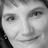

In [6]:
Image.open(train_ds[0])

In [7]:
sample = cv2.imread(str(train_ds[0]))
sample.shape

(48, 48, 3)

(48, 48)


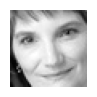

In [8]:
sample_gray = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
print(sample_gray.shape)
plt.figure(figsize=(1, 1))
plt.imshow(sample_gray, cmap='gray')
plt.axis('off')
plt.show()

#### Creation of dictionaries for mapping data from the model

In [9]:
labels_dct = {
    'angry': 0,
    'fear': 1,
    'happy': 2,
    'neutral': 3,
    'sad': 4,
    'surprise': 5,
    'disgust': 6,
}

get_label_name = {value: key for key, value in labels_dct.items()}

train_labels_dct = {
    'angry': list(dataset_dir_train.glob('angry/*.jpg')),
    'fear': list(dataset_dir_train.glob('fear/*.jpg')),
    'happy': list(dataset_dir_train.glob('happy/*.jpg')),
    'neutral': list(dataset_dir_train.glob('neutral/*.jpg')),
    'sad': list(dataset_dir_train.glob('sad/*.jpg')),
    'surprise': list(dataset_dir_train.glob('surprise/*.jpg')),
    'disgust': list(dataset_dir_train.glob('disgust/*.jpg')),
}

test_labels_dct = {
    'angry': list(dataset_dir_test.glob('angry/*.jpg')),
    'fear': list(dataset_dir_test.glob('fear/*.jpg')),
    'happy': list(dataset_dir_test.glob('happy/*.jpg')),
    'neutral': list(dataset_dir_test.glob('neutral/*.jpg')),
    'sad': list(dataset_dir_test.glob('sad/*.jpg')),
    'surprise': list(dataset_dir_test.glob('surprise/*.jpg')),
    'disgust': list(dataset_dir_test.glob('disgust/*.jpg')),
}

In [10]:
last_layer = len(train_labels_dct)
last_layer

7

#### Data reduction to the class with the least number of samples

In [11]:
mood = 'angry'
mood_count = len(train_labels_dct[mood])

for k, v in train_labels_dct.items():
    if len(v) < mood_count:
        mood_count = len(v)
        mood = k
    print(f'{k} - number of samples: {len(v)}')

print('\n', mood, mood_count)

angry - number of samples: 3995
fear - number of samples: 4097
happy - number of samples: 7215
neutral - number of samples: 4965
sad - number of samples: 4830
surprise - number of samples: 3171
disgust - number of samples: 436

 disgust 436


In [12]:
for k, v in train_labels_dct.items():
    if k != mood:
        train_labels_dct[k] = np.random.choice(v, size=mood_count)

In [13]:
for k, v in train_labels_dct.items():
    print(f'{k} - number of samples: {len(v)}')

angry - number of samples: 436
fear - number of samples: 436
happy - number of samples: 436
neutral - number of samples: 436
sad - number of samples: 436
surprise - number of samples: 436
disgust - number of samples: 436


In [14]:
mood = 'angry'
mood_count = len(test_labels_dct[mood])

for k, v in test_labels_dct.items():
    if len(v) < mood_count:
        mood_count = len(v)
        mood = k
    print(f'{k} - number of samples: {len(v)}')

print('\n', mood, mood_count)

angry - number of samples: 958
fear - number of samples: 1024
happy - number of samples: 1774
neutral - number of samples: 1233
sad - number of samples: 1247
surprise - number of samples: 831
disgust - number of samples: 111

 disgust 111


In [15]:
for k, v in test_labels_dct.items():
    if k != mood:
        test_labels_dct[k] = np.random.choice(v, size=mood_count)

In [16]:
for k, v in test_labels_dct.items():
    print(f'{k} - number of samples: {len(v)}')

angry - number of samples: 111
fear - number of samples: 111
happy - number of samples: 111
neutral - number of samples: 111
sad - number of samples: 111
surprise - number of samples: 111
disgust - number of samples: 111


#### Test loading an external photo

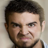

In [17]:
Image.open('1.jpg').resize((48, 48))

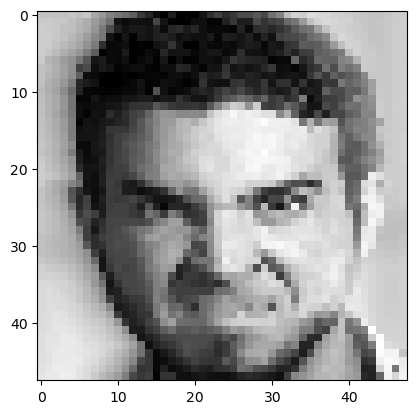

In [18]:
a = cv2.imread('1.jpg')
c = cv2.resize(a, (48, 48))
b = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
plt.imshow(b, cmap='gray')
plt.show()

In [19]:
b

array([[165, 164, 164, ..., 167, 171, 173],
       [170, 170, 169, ..., 169, 172, 174],
       [174, 172, 169, ..., 169, 172, 174],
       ...,
       [188, 192, 196, ..., 210, 207, 196],
       [190, 194, 198, ..., 207, 100, 200],
       [192, 196, 197, ..., 205, 181, 205]], dtype=uint8)

In [20]:
b.shape

(48, 48)

#### Create training data and test data

In [21]:
X_train, y_train = [], []

for mood, images in train_labels_dct.items():
    for image in images:
        img = cv2.imread(str(image))
        # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # X_train.append(img_gray)
        X_train.append(img)
        y_train.append(labels_dct[mood])

In [22]:
len(X_train), len(y_train)

(3052, 3052)

In [23]:
X_test, y_test = [], []

for mood, images in test_labels_dct.items():
    for image in images:
        img = cv2.imread(str(image))
        # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # X_test.append(img_gray)
        X_test.append(img)
        y_test.append(labels_dct[mood])

In [24]:
len(X_test), len(y_test)

(777, 777)

In [25]:
np.array(X_train).shape

(3052, 48, 48, 3)

In [26]:
np.array(y_train).shape

(3052,)

In [27]:
np.array(X_test).shape

(777, 48, 48, 3)

In [28]:
np.array(y_test).shape

(777,)

#### Data shuffle

In [29]:
combined_train = list(zip(X_train, y_train))
np.random.shuffle(combined_train)
X_train_shuffled, y_train_shuffled = zip(*combined_train)

In [30]:
combined_test = list(zip(X_test, y_test))
np.random.shuffle(combined_test)
X_test_shuffled, y_test_shuffled = zip(*combined_test)

In [31]:
X_train_shuffled = np.array(X_train_shuffled)
X_test_shuffled = np.array(X_test_shuffled)

In [32]:
X_train_shuffled = X_train_shuffled / 255
X_test_shuffled = X_test_shuffled / 255

In [33]:
y_train_shuffled = np.array(y_train_shuffled)
y_test_shuffled = np.array(y_test_shuffled)

In [34]:
def show_img(X, y, index):
    plt.figure(figsize=(3, 3))
    plt.title(get_label_name[y[index]])
    plt.imshow(X[index])
    plt.show()

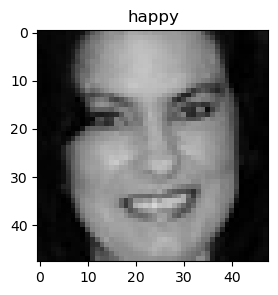

In [36]:
show_img(X_train_shuffled, y_train_shuffled, np.random.randint(0, len(X_train_shuffled)))

In [37]:
np.bincount(y_train_shuffled)

array([436, 436, 436, 436, 436, 436, 436])

In [40]:
X_train_shuffled.shape

(3052, 48, 48, 3)

In [41]:
X_test_shuffled.shape

(777, 48, 48, 3)

In [42]:
X_test_shuffled.shape[0] / X_train_shuffled.shape[0]

0.2545871559633027

### Model 1

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48, 3,)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01),),
    tf.keras.layers.Dense(128, activation='relu',),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', ),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(last_layer, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [45]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [46]:
epochs = 20
history = model.fit(X_train_shuffled, y_train_shuffled, 
                     epochs=epochs, batch_size=32, verbose=2, )

Epoch 1/20


2024-04-28 09:47:52.367454: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


96/96 - 4s - loss: 1.9488 - accuracy: 0.1343 - 4s/epoch - 47ms/step
Epoch 2/20
96/96 - 3s - loss: 1.9321 - accuracy: 0.1769 - 3s/epoch - 30ms/step
Epoch 3/20
96/96 - 2s - loss: 1.8552 - accuracy: 0.2457 - 2s/epoch - 24ms/step
Epoch 4/20
96/96 - 2s - loss: 1.7617 - accuracy: 0.3100 - 2s/epoch - 23ms/step
Epoch 5/20
96/96 - 2s - loss: 1.6494 - accuracy: 0.3660 - 2s/epoch - 21ms/step
Epoch 6/20
96/96 - 2s - loss: 1.5364 - accuracy: 0.4142 - 2s/epoch - 21ms/step
Epoch 7/20
96/96 - 2s - loss: 1.4130 - accuracy: 0.4705 - 2s/epoch - 20ms/step
Epoch 8/20
96/96 - 2s - loss: 1.2691 - accuracy: 0.5344 - 2s/epoch - 21ms/step
Epoch 9/20
96/96 - 2s - loss: 1.1149 - accuracy: 0.5904 - 2s/epoch - 21ms/step
Epoch 10/20
96/96 - 2s - loss: 0.9454 - accuracy: 0.6566 - 2s/epoch - 20ms/step
Epoch 11/20
96/96 - 2s - loss: 0.7524 - accuracy: 0.7310 - 2s/epoch - 20ms/step
Epoch 12/20
96/96 - 2s - loss: 0.5817 - accuracy: 0.7877 - 2s/epoch - 20ms/step
Epoch 13/20
96/96 - 2s - loss: 0.4291 - accuracy: 0.8552 - 2

In [47]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

model_loss.append(loss)
model_acc.append(acc)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 4.264220237731934, Model accuracy: 0.3989703953266144'

In [48]:
get_label_name

{0: 'angry',
 1: 'fear',
 2: 'happy',
 3: 'neutral',
 4: 'sad',
 5: 'surprise',
 6: 'disgust'}

#### Analysis of the model training process

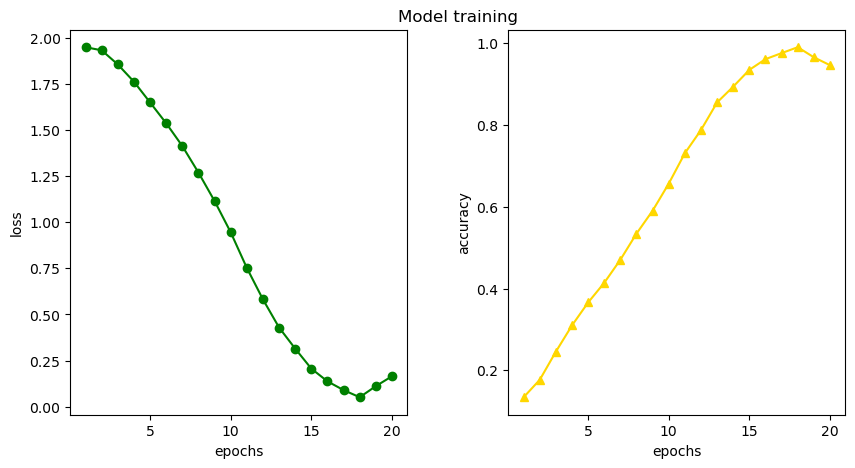

In [49]:
def show_training_data():
    loss = history.history['loss']
    acc = history.history['accuracy']
    model_epochs = np.arange(1, epochs + 1)

    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.title('Model training')

    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(model_epochs, loss, marker='o', color='green')

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(model_epochs, acc, marker='^', color='gold')

    plt.subplots_adjust(wspace=0.3)
    plt.show()

show_training_data()

#### Model test on external photos

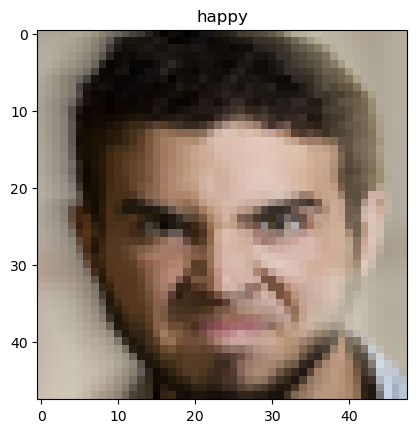

In [50]:
test = Image.open('1.jpg').resize((48, 48))

plt.imshow(test, cmap='gray')
test_resized = np.expand_dims(test, axis=0)


predictions = model.predict(test_resized, verbose=0)
plt.title(get_label_name[np.argmax(predictions)])
plt.show()

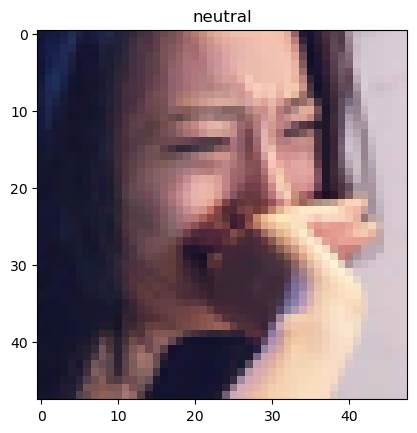

In [51]:
test = Image.open('2.jpg').resize((48, 48))

plt.imshow(test, cmap='gray')
test_resized = np.expand_dims(test, axis=0)


predictions = model.predict(test_resized, verbose=0)
plt.title(get_label_name[np.argmax(predictions)])
plt.show()

#### Visualize predictions on an example sample

In [52]:
def pred_img(data, index=None, angry_mood_in_ds=True, is_gray=True):

    cmap = 'gray' if is_gray else None

    if not index:
        index = np.random.randint(len(data))
    preds = model.predict(data, verbose=False)
    preds_idx = preds[index]
    preds_idx = preds_idx.reshape(-1)

    em_dct = {
        'fear': 'emojis/Fear.png',
        'happy': 'emojis/Happy.png',
        'neutral': 'emojis/Neutral.png',
        'sad': 'emojis/Sad.png',
        'surprise': 'emojis/Surprise.png',
        'disgust': 'emojis/Disgust.png',
    }

    if angry_mood_in_ds:
        em_dct.update({'angry': 'emojis/Angry.png',})

    plt.figure(figsize=(10, 5))
    mood = get_label_name[np.argmax(preds_idx)]
    plt.suptitle(mood)

    plt.subplot(1, 3, 1)
    plt.axis('off')
    plt.imshow(data[index], cmap=cmap)

    plt.subplot(1, 3, 2)
    plt.xticks(range(len(preds_idx)))
    plt.bar(range(len(preds_idx)), preds_idx, 
            color=['red', 'darkorange', 'royalblue', 'seagreen',
                    'mediumpurple', 'gold', 'magenta'])

    plt.subplot(1, 3, 3)
    em = plt.imread(em_dct[mood])

    plt.axis('off')
    plt.imshow(em, cmap=cmap)
    plt.subplots_adjust(wspace=0.3)
    plt.show()


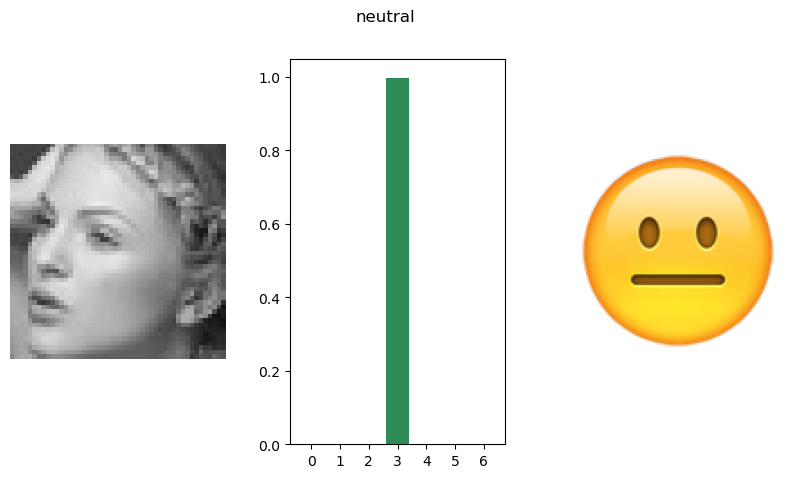

In [53]:
pred_img(X_test_shuffled)

In [54]:
X_train_shuffled.shape

(3052, 48, 48, 3)

In [55]:
X_test_shuffled.shape

(777, 48, 48, 3)

In [56]:
X_train_shuffled, X_valid_shuffled, y_train_shuffled, y_valid_shuffled = train_test_split(X_train_shuffled, y_train_shuffled, test_size=0.2)

In [57]:
X_train_shuffled.shape

(2441, 48, 48, 3)

In [58]:
X_valid_shuffled.shape

(611, 48, 48, 3)

### Model 2

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48, 3,)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01),),
    tf.keras.layers.Dense(128, activation='relu',),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', ),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(last_layer, activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [61]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

In [62]:
epochs = 30
history = model.fit(X_train_shuffled, y_train_shuffled, validation_data=(X_valid_shuffled, y_valid_shuffled),
                     epochs=epochs, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/30
77/77 - 2s - loss: 1.9474 - accuracy: 0.1458 - val_loss: 1.9441 - val_accuracy: 0.1473 - 2s/epoch - 26ms/step
Epoch 2/30
77/77 - 2s - loss: 1.9297 - accuracy: 0.1782 - val_loss: 1.8854 - val_accuracy: 0.2160 - 2s/epoch - 24ms/step
Epoch 3/30
77/77 - 2s - loss: 1.8406 - accuracy: 0.2519 - val_loss: 1.8450 - val_accuracy: 0.2275 - 2s/epoch - 25ms/step
Epoch 4/30
77/77 - 2s - loss: 1.7842 - accuracy: 0.2921 - val_loss: 1.8431 - val_accuracy: 0.2766 - 2s/epoch - 23ms/step
Epoch 5/30
77/77 - 2s - loss: 1.7169 - accuracy: 0.3351 - val_loss: 1.7830 - val_accuracy: 0.3011 - 2s/epoch - 22ms/step
Epoch 6/30
77/77 - 2s - loss: 1.6186 - accuracy: 0.3806 - val_loss: 1.7472 - val_accuracy: 0.3453 - 2s/epoch - 23ms/step
Epoch 7/30
77/77 - 2s - loss: 1.5141 - accuracy: 0.4273 - val_loss: 1.6948 - val_accuracy: 0.3437 - 2s/epoch - 23ms/step
Epoch 8/30
77/77 - 2s - loss: 1.3859 - accuracy: 0.4941 - val_loss: 1.7660 - val_accuracy: 0.3584 - 2s/epoch - 23ms/step
Epoch 9/30
77/77 - 2s - loss: 1.

In [63]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

model_loss.append(loss)
model_acc.append(acc)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 6.285677909851074, Model accuracy: 0.3770913779735565'

#### Analysis of the model training process

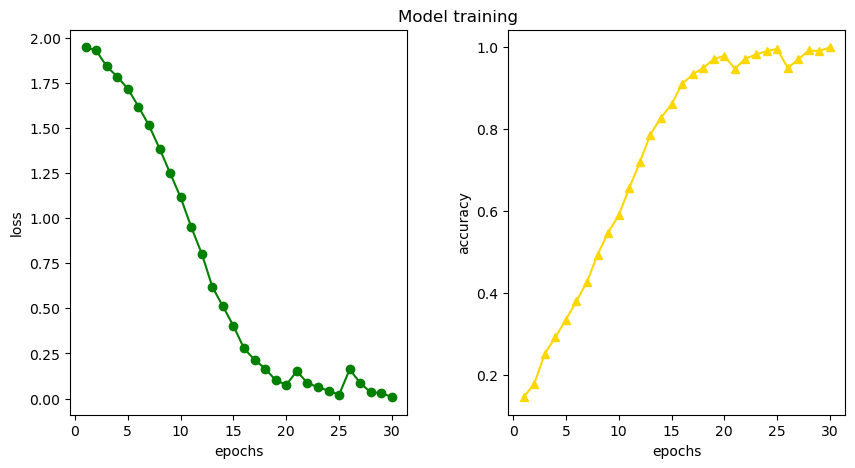

In [64]:
show_training_data()

In [65]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Analysis of validation data used in the model training process

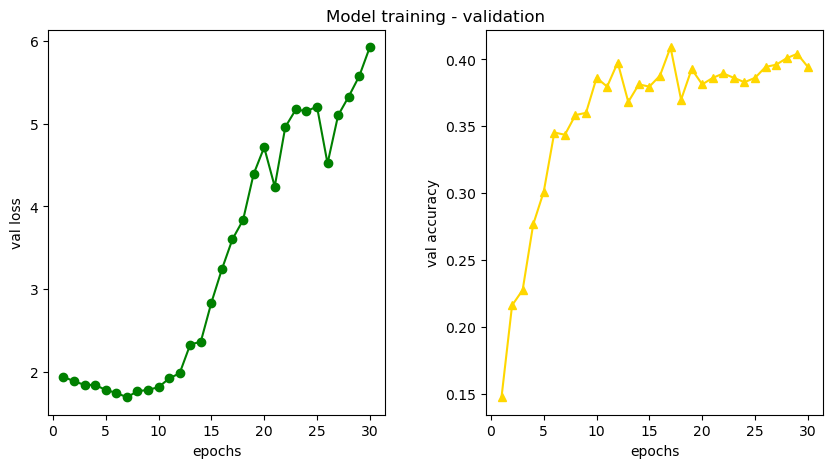

In [66]:
def show_training_data_val():
    loss = history.history['val_loss']
    acc = history.history['val_accuracy']
    model_epochs = np.arange(1, epochs + 1)

    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.title('Model training - validation')

    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('val loss')
    plt.plot(model_epochs, loss, marker='o', color='green')

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('val accuracy')
    plt.plot(model_epochs, acc, marker='^', color='gold')

    plt.subplots_adjust(wspace=0.3)
    plt.show()

show_training_data_val()

#### Visualize the model's predictions on a sample sample

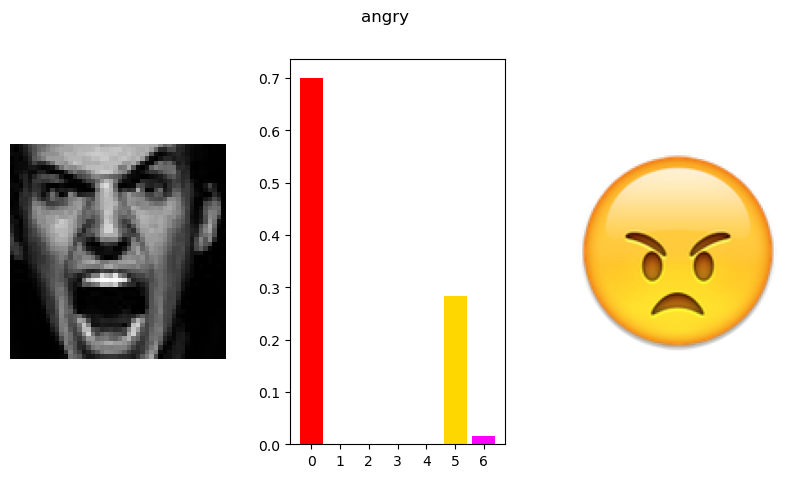

In [67]:
pred_img(X_test_shuffled)

### Model 3

#### Added BatchNormalization, L2 regularization, padding='same', kernel_initializer='he_normal' and Dropout layers

In [68]:
# Colossal model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48, 3,)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same',
                           kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5, 5), activation='elu', padding='same',
                           kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(128, (5, 5),activation='relu',padding='same',
          kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (5, 5),activation='elu',padding='same',
                           kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(256, (3, 3),activation='relu',padding='same',
                           kernel_initializer='he_normal',),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3),activation='elu',padding='same',
                           kernel_initializer='he_normal',),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(7, activation='softmax'),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                      

In [69]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.0005), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [70]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

In [71]:
epochs = 20
history = model.fit(X_train_shuffled, y_train_shuffled, validation_data=(X_valid_shuffled, y_valid_shuffled),
                     epochs=epochs, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/20


77/77 - 53s - loss: 10.3164 - accuracy: 0.1581 - val_loss: 9.3491 - val_accuracy: 0.1620 - 53s/epoch - 682ms/step
Epoch 2/20
77/77 - 53s - loss: 9.2779 - accuracy: 0.1798 - val_loss: 8.7470 - val_accuracy: 0.1915 - 53s/epoch - 686ms/step
Epoch 3/20
77/77 - 52s - loss: 8.5260 - accuracy: 0.2016 - val_loss: 8.1294 - val_accuracy: 0.1735 - 52s/epoch - 669ms/step
Epoch 4/20
77/77 - 52s - loss: 7.8334 - accuracy: 0.2032 - val_loss: 7.5056 - val_accuracy: 0.1669 - 52s/epoch - 675ms/step
Epoch 5/20
77/77 - 52s - loss: 7.1105 - accuracy: 0.2192 - val_loss: 6.8467 - val_accuracy: 0.2046 - 52s/epoch - 673ms/step
Epoch 6/20
77/77 - 53s - loss: 6.4661 - accuracy: 0.2327 - val_loss: 6.1158 - val_accuracy: 0.2439 - 53s/epoch - 684ms/step
Epoch 7/20
77/77 - 50s - loss: 5.8387 - accuracy: 0.2421 - val_loss: 5.5740 - val_accuracy: 0.2324 - 50s/epoch - 655ms/step
Epoch 8/20
77/77 - 48s - loss: 5.2839 - accuracy: 0.2569 - val_loss: 5.0577 - val_accuracy: 0.2537 - 48s/epoch - 624ms/step
Epoch 9/20
77/77 -

In [72]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

model_loss.append(loss)
model_acc.append(acc)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 2.3619954586029053, Model accuracy: 0.3191763162612915'

#### Analysis of the model training process

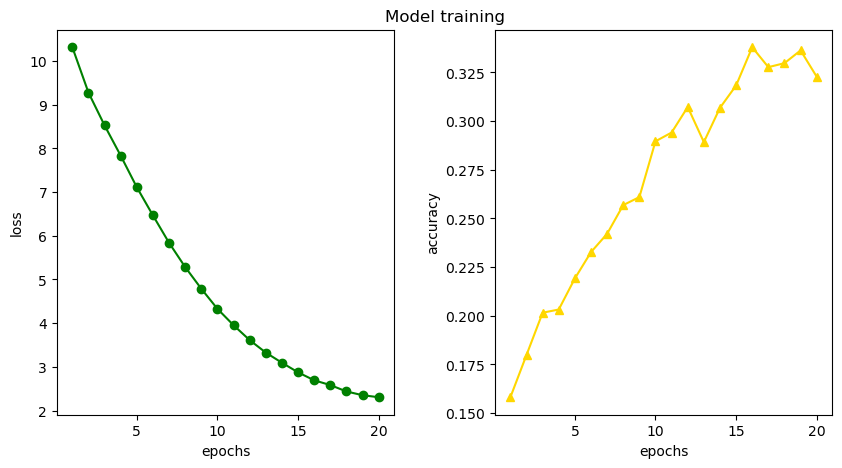

In [73]:
show_training_data()

#### Analysis of validation data used in the model training process

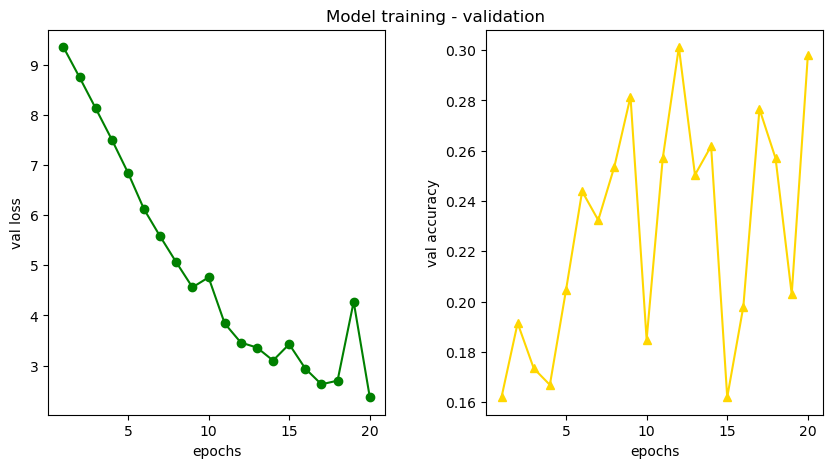

In [74]:
show_training_data_val()

#### Visualize the model's predictions on a sample sample

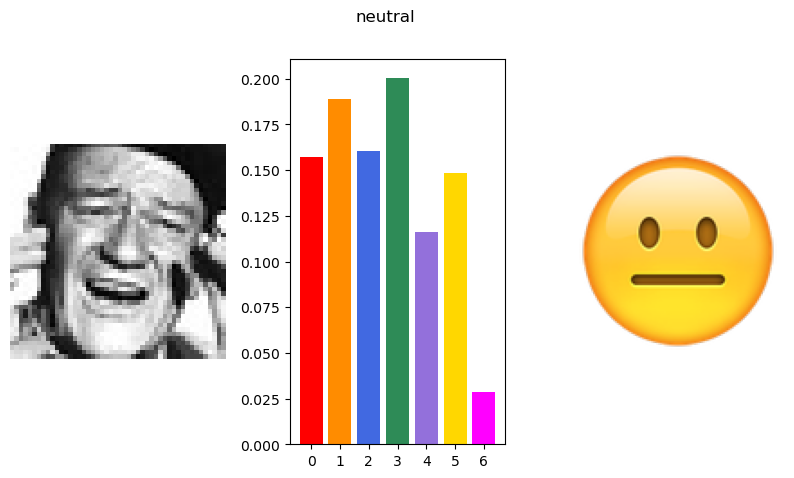

In [75]:
pred_img(X_test_shuffled)

## Building a neural network - with all classes of emotions on the Gray scale

#### Create training data and test data

In [76]:
X_train, y_train = [], []

for mood, images in train_labels_dct.items():
    for image in images:
        img = cv2.imread(str(image))
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X_train.append(img_gray)
        y_train.append(labels_dct[mood])

In [77]:
len(X_train), len(y_train)

(3052, 3052)

In [78]:
X_test, y_test = [], []

for mood, images in test_labels_dct.items():
    for image in images:
        img = cv2.imread(str(image))
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X_test.append(img_gray)
        y_test.append(labels_dct[mood])

In [79]:
len(X_test), len(y_test)

(777, 777)

In [80]:
np.array(X_train).shape

(3052, 48, 48)

In [81]:
np.array(y_train).shape

(3052,)

In [82]:
np.array(X_test).shape

(777, 48, 48)

In [83]:
np.array(y_test).shape

(777,)

#### Data shuffle

In [84]:
combined_train = list(zip(X_train, y_train))
np.random.shuffle(combined_train)
X_train_shuffled, y_train_shuffled = zip(*combined_train)

In [85]:
combined_test = list(zip(X_test, y_test))
np.random.shuffle(combined_test)
X_test_shuffled, y_test_shuffled = zip(*combined_test)

In [86]:
X_train_shuffled = np.array(X_train_shuffled)
X_test_shuffled = np.array(X_test_shuffled)

In [87]:
X_train_shuffled = X_train_shuffled / 255
X_test_shuffled = X_test_shuffled / 255

In [88]:
y_train_shuffled = np.array(y_train_shuffled)
y_test_shuffled = np.array(y_test_shuffled)

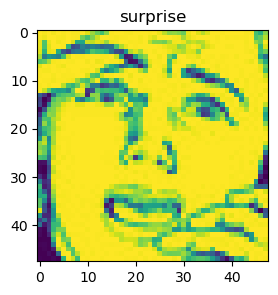

In [89]:
show_img(X_train_shuffled, y_train_shuffled, np.random.randint(0, len(X_train_shuffled)))

In [90]:
X_train_shuffled.shape

(3052, 48, 48)

### Model 4

In [91]:
# Debugging API - complex models

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(48, 48, 1)),)
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', ),)
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)),)
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', ),)
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)),)
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', ),)
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)),)

model.add(tf.keras.layers.Flatten(),)
model.add(tf.keras.layers.Dense(128, activation='relu',),)
model.add(tf.keras.layers.Dense(64, activation='relu', ),)
model.add(tf.keras.layers.Dense(last_layer, activation='softmax'),)


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 128)       

In [92]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [93]:
epochs = 20
history = model.fit(X_train_shuffled, y_train_shuffled, 
                     epochs=epochs, batch_size=32, verbose=2, )

Epoch 1/20


96/96 - 2s - loss: 1.9469 - accuracy: 0.1461 - 2s/epoch - 25ms/step
Epoch 2/20
96/96 - 2s - loss: 1.8872 - accuracy: 0.2199 - 2s/epoch - 21ms/step
Epoch 3/20
96/96 - 2s - loss: 1.8122 - accuracy: 0.2729 - 2s/epoch - 21ms/step
Epoch 4/20
96/96 - 2s - loss: 1.7361 - accuracy: 0.3195 - 2s/epoch - 22ms/step
Epoch 5/20
96/96 - 2s - loss: 1.6550 - accuracy: 0.3696 - 2s/epoch - 21ms/step
Epoch 6/20
96/96 - 2s - loss: 1.5536 - accuracy: 0.4083 - 2s/epoch - 21ms/step
Epoch 7/20
96/96 - 2s - loss: 1.4777 - accuracy: 0.4436 - 2s/epoch - 24ms/step
Epoch 8/20
96/96 - 2s - loss: 1.3678 - accuracy: 0.4928 - 2s/epoch - 21ms/step
Epoch 9/20
96/96 - 2s - loss: 1.2746 - accuracy: 0.5344 - 2s/epoch - 22ms/step
Epoch 10/20
96/96 - 2s - loss: 1.1452 - accuracy: 0.5858 - 2s/epoch - 23ms/step
Epoch 11/20
96/96 - 2s - loss: 1.0342 - accuracy: 0.6193 - 2s/epoch - 22ms/step
Epoch 12/20
96/96 - 2s - loss: 0.8955 - accuracy: 0.6773 - 2s/epoch - 21ms/step
Epoch 13/20
96/96 - 2s - loss: 0.7502 - accuracy: 0.7307 - 2

In [94]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

model_loss.append(loss)
model_acc.append(acc)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 3.903791904449463, Model accuracy: 0.40797939896583557'

#### Analysis of the model training process

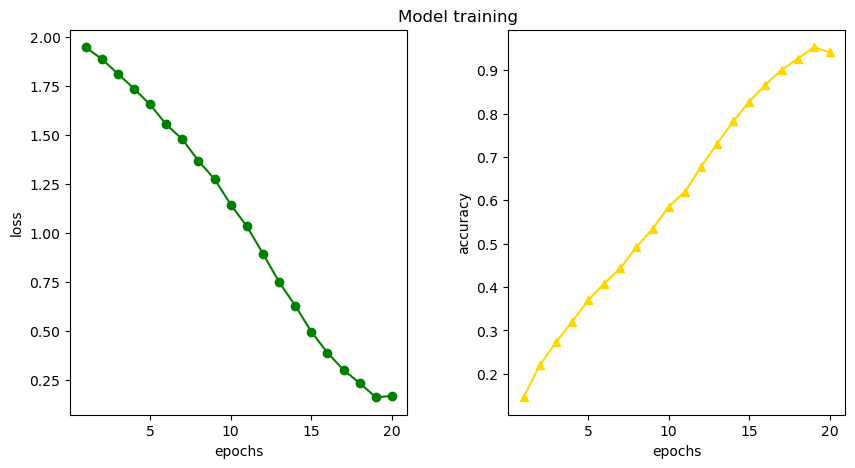

In [95]:
show_training_data()

#### Visualize the model's predictions on a sample sample

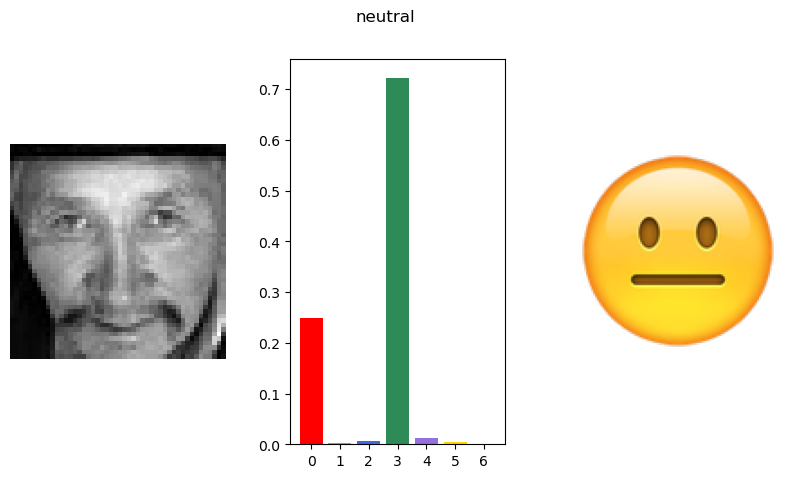

In [96]:
pred_img(X_test_shuffled, is_gray=True)

In [97]:
X_train_shuffled, X_valid_shuffled, y_train_shuffled, y_valid_shuffled = train_test_split(X_train_shuffled, y_train_shuffled, test_size=0.2)

### Model 5

In [98]:
# Functional API (bit more flexible)

inputs = tf.keras.layers.Input(shape=(48, 48, 1,))
x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', )(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', )(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', )(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu',)(x)
x = tf.keras.layers.Dense(64, activation='relu', )(x)
outputs = tf.keras.layers.Dense(last_layer, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 128)         73856 

In [99]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [100]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

In [101]:
epochs = 30
history = model.fit(X_train_shuffled, y_train_shuffled, validation_data=(X_valid_shuffled, y_valid_shuffled),
                     epochs=epochs, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/30
77/77 - 2s - loss: 1.9463 - accuracy: 0.1536 - val_loss: 1.9430 - val_accuracy: 0.1751 - 2s/epoch - 27ms/step
Epoch 2/30
77/77 - 2s - loss: 1.9293 - accuracy: 0.1839 - val_loss: 1.8807 - val_accuracy: 0.2226 - 2s/epoch - 25ms/step
Epoch 3/30
77/77 - 2s - loss: 1.8498 - accuracy: 0.2466 - val_loss: 1.8307 - val_accuracy: 0.2553 - 2s/epoch - 23ms/step
Epoch 4/30
77/77 - 2s - loss: 1.7813 - accuracy: 0.2884 - val_loss: 1.7920 - val_accuracy: 0.2520 - 2s/epoch - 22ms/step
Epoch 5/30
77/77 - 2s - loss: 1.7048 - accuracy: 0.3372 - val_loss: 1.7147 - val_accuracy: 0.3355 - 2s/epoch - 22ms/step
Epoch 6/30
77/77 - 2s - loss: 1.6035 - accuracy: 0.3994 - val_loss: 1.7724 - val_accuracy: 0.3061 - 2s/epoch - 22ms/step
Epoch 7/30
77/77 - 2s - loss: 1.5168 - accuracy: 0.4314 - val_loss: 1.6161 - val_accuracy: 0.3715 - 2s/epoch - 23ms/step
Epoch 8/30
77/77 - 2s - loss: 1.3942 - accuracy: 0.4773 - val_loss: 1.6481 - val_accuracy: 0.3944 - 2s/epoch - 22ms/step
Epoch 9/30
77/77 - 2s - loss: 1.

In [102]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

model_loss.append(loss)
model_acc.append(acc)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 6.463016986846924, Model accuracy: 0.38738739490509033'

#### Analysis of the model training process

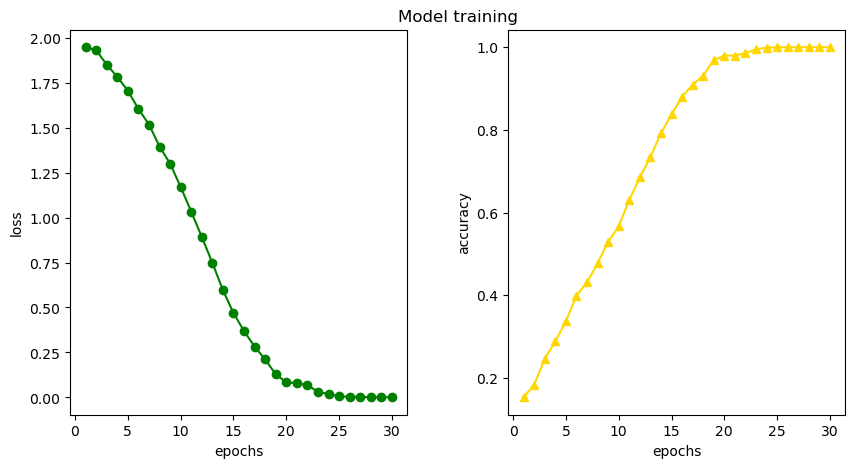

In [103]:
show_training_data()

#### Analysis of validation data used in the model training process

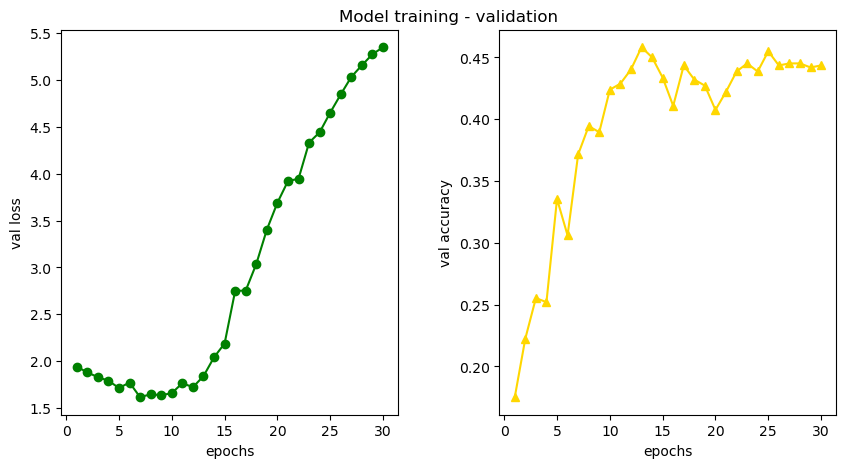

In [104]:
show_training_data_val()

#### Visualize the model's predictions on a sample sample

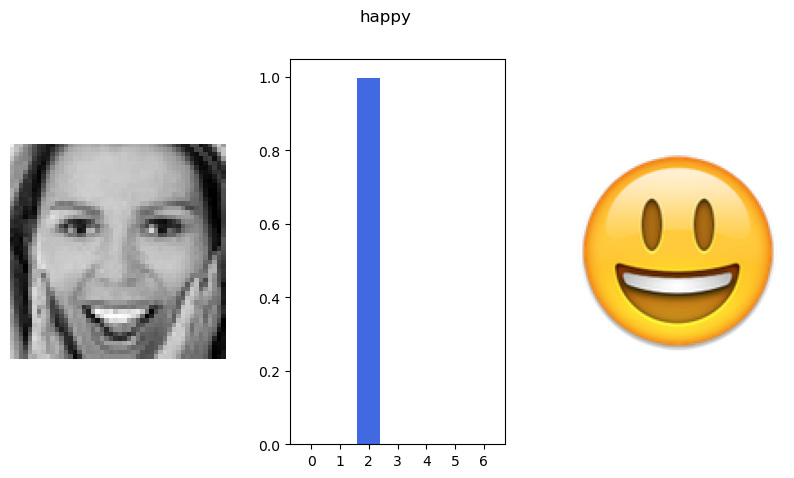

In [105]:
pred_img(X_test_shuffled, )

### Model 6

#### Added BatchNormalization, L2 regularization, padding='same', kernel_initializer='he_normal' and Dropout layers

In [106]:
# Colossal model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48, 1,)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same',
                           kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5, 5), activation='elu', padding='same',
                           kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(128, (5, 5),activation='relu',padding='same',
          kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (5, 5),activation='elu',padding='same',
                           kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(256, (3, 3),activation='relu',padding='same',
                           kernel_initializer='he_normal',),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3),activation='elu',padding='same',
                           kernel_initializer='he_normal',),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(7, activation='softmax'),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 64)        1664      
                                                                 
 batch_normalization_7 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_19 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                      

In [107]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.0005), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [108]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

In [109]:
epochs = 20
history = model.fit(X_train_shuffled, y_train_shuffled, validation_data=(X_valid_shuffled, y_valid_shuffled),
                     epochs=epochs, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/20
77/77 [==============================] - 51s 663ms/step - loss: 10.0628 - accuracy: 0.1823 - val_loss: 9.3875 - val_accuracy: 0.1440
Epoch 2/20
77/77 [==============================] - 49s 637ms/step - loss: 9.0987 - accuracy: 0.1819 - val_loss: 8.7558 - val_accuracy: 0.1506
Epoch 3/20
77/77 [==============================] - 49s 636ms/step - loss: 8.4195 - accuracy: 0.2102 - val_loss: 8.0821 - val_accuracy: 0.1931
Epoch 4/20
77/77 [==============================] - 49s 636ms/step - loss: 7.7797 - accuracy: 0.2089 - val_loss: 7.4138 - val_accuracy: 0.2471
Epoch 5/20
77/77 [==============================] - 49s 632ms/step - loss: 7.1203 - accuracy: 0.2253 - val_loss: 6.8490 - val_accuracy: 0.2651
Epoch 6/20
77/77 [==============================] - 50s 644ms/step - loss: 6.5057 - accuracy: 0.2298 - val_loss: 6.2347 - val_accuracy: 0.2275
Epoch 7/20
77/77 [==============================] - 48s 630ms/step - loss: 5.9084 - accuracy: 0.2450 - val_loss: 5.6209 - val_accuracy: 0.263

In [110]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

model_loss.append(loss)
model_acc.append(acc)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 2.2966628074645996, Model accuracy: 0.3011583089828491'

#### Analysis of the model training process

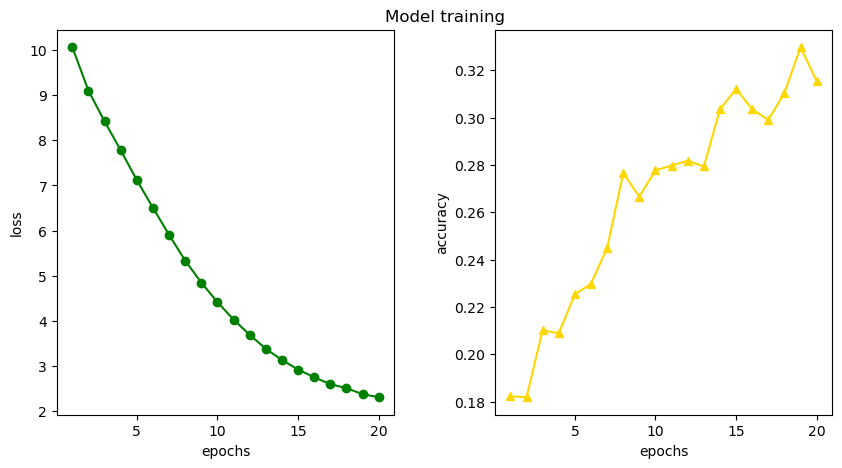

In [111]:
show_training_data()

#### Analysis of validation data used in the model training process

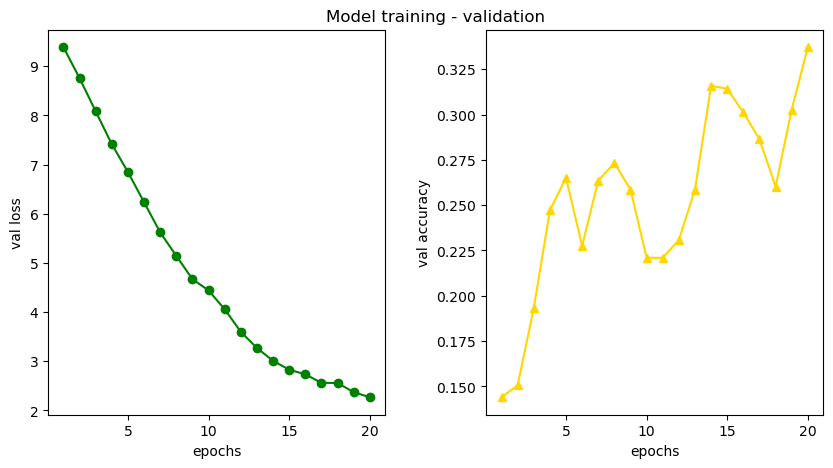

In [112]:
show_training_data_val()

#### Visualize the model's predictions on a sample sample

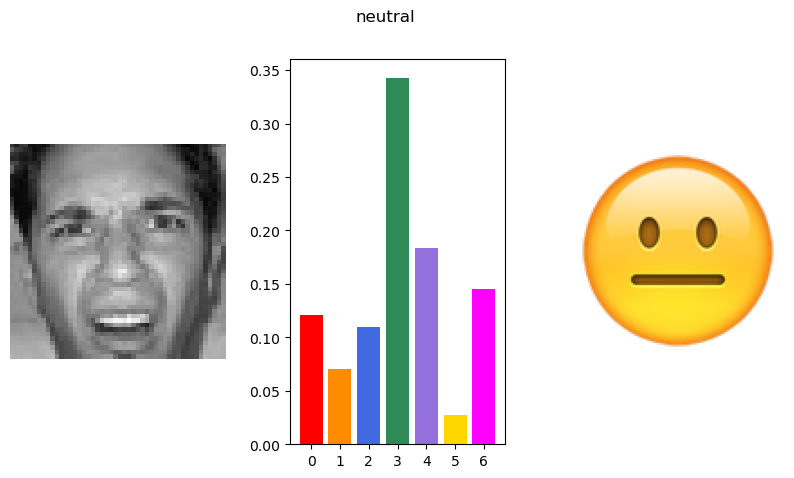

In [113]:
pred_img(X_test_shuffled)

## Construction of a neural network - without the smallest emotion class on the RGB scale

In [114]:
dataset_dir_train = pathlib.Path('train')
train_ds = list(dataset_dir_train.glob('*/*.jpg'))
len(train_ds)

28709

In [115]:
dataset_dir_test = pathlib.Path('test')
test_ds = list(dataset_dir_test.glob('*/*.jpg'))
len(test_ds)

7178

#### Creation of dictionaries for mapping data from the model

In [116]:
labels_dct = {
    'angry': 0,
    'fear': 1,
    'happy': 2,
    'neutral': 3,
    'sad': 4,
    'surprise': 5,
    'disgust': 6,
}

get_label_name = {value: key for key, value in labels_dct.items()}

train_labels_dct = {
    'angry': list(dataset_dir_train.glob('angry/*.jpg')),
    'fear': list(dataset_dir_train.glob('fear/*.jpg')),
    'happy': list(dataset_dir_train.glob('happy/*.jpg')),
    'neutral': list(dataset_dir_train.glob('neutral/*.jpg')),
    'sad': list(dataset_dir_train.glob('sad/*.jpg')),
    'surprise': list(dataset_dir_train.glob('surprise/*.jpg')),
    'disgust': list(dataset_dir_train.glob('disgust/*.jpg')),
}

test_labels_dct = {
    'angry': list(dataset_dir_test.glob('angry/*.jpg')),
    'fear': list(dataset_dir_test.glob('fear/*.jpg')),
    'happy': list(dataset_dir_test.glob('happy/*.jpg')),
    'neutral': list(dataset_dir_test.glob('neutral/*.jpg')),
    'sad': list(dataset_dir_test.glob('sad/*.jpg')),
    'surprise': list(dataset_dir_test.glob('surprise/*.jpg')),
    'disgust': list(dataset_dir_test.glob('disgust/*.jpg')),
}

In [117]:
last_layer = len(train_labels_dct)
last_layer

7

#### Remove the class with the fewest samples

In [118]:
mood = 'angry'
mood_count = len(train_labels_dct[mood])

for k, v in train_labels_dct.items():
    if len(v) < mood_count:
        mood_count = len(v)
        mood = k
    print(f'{k} - number of samples: {len(v)}')

print('\n', mood, mood_count)

angry - number of samples: 3995
fear - number of samples: 4097
happy - number of samples: 7215
neutral - number of samples: 4965
sad - number of samples: 4830
surprise - number of samples: 3171
disgust - number of samples: 436

 disgust 436


In [119]:
mood = 'angry'
mood_count = len(test_labels_dct[mood])

for k, v in test_labels_dct.items():
    if len(v) < mood_count:
        mood_count = len(v)
        mood = k
    print(f'{k} - number of samples: {len(v)}')

print('\n', mood, mood_count)

angry - number of samples: 958
fear - number of samples: 1024
happy - number of samples: 1774
neutral - number of samples: 1233
sad - number of samples: 1247
surprise - number of samples: 831
disgust - number of samples: 111

 disgust 111


In [ ]:
get_label_name = {key: value for key, value in get_label_name.items() if value != mood}
get_label_name

{0: 'angry', 1: 'fear', 2: 'happy', 3: 'neutral', 4: 'sad', 5: 'surprise'}

In [121]:
del labels_dct[mood], train_labels_dct[mood], test_labels_dct[mood]

In [122]:
labels_dct

{'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}

In [123]:
mood = 'angry'
mood_count = len(train_labels_dct[mood])

for k, v in train_labels_dct.items():
    if len(v) < mood_count:
        mood_count = len(v)
        mood = k
    print(f'{k} - number of samples: {len(v)}')

print('\n', mood, mood_count)

angry - number of samples: 3995
fear - number of samples: 4097
happy - number of samples: 7215
neutral - number of samples: 4965
sad - number of samples: 4830
surprise - number of samples: 3171

 surprise 3171


In [124]:
for k, v in train_labels_dct.items():
    if k != mood:
        train_labels_dct[k] = np.random.choice(v, size=mood_count)

In [125]:
for k, v in train_labels_dct.items():
    print(f'{k} - number of samples: {len(v)}')

angry - number of samples: 3171
fear - number of samples: 3171
happy - number of samples: 3171
neutral - number of samples: 3171
sad - number of samples: 3171
surprise - number of samples: 3171


In [126]:
mood = 'angry'
mood_count = len(test_labels_dct[mood])

for k, v in test_labels_dct.items():
    if len(v) < mood_count:
        mood_count = len(v)
        mood = k
    print(f'{k} - number of samples: {len(v)}')

print('\n', mood, mood_count)

angry - number of samples: 958
fear - number of samples: 1024
happy - number of samples: 1774
neutral - number of samples: 1233
sad - number of samples: 1247
surprise - number of samples: 831

 surprise 831


In [127]:
for k, v in test_labels_dct.items():
    if k != mood:
        test_labels_dct[k] = np.random.choice(v, size=mood_count)

In [128]:
for k, v in test_labels_dct.items():
    print(f'{k} - number of samples: {len(v)}')

angry - number of samples: 831
fear - number of samples: 831
happy - number of samples: 831
neutral - number of samples: 831
sad - number of samples: 831
surprise - number of samples: 831


#### Create training data and test data

In [129]:
X_train, y_train = [], []

for mood, images in train_labels_dct.items():
    for image in images:
        img = cv2.imread(str(image))
        # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # X_train.append(img_gray)
        X_train.append(img)
        y_train.append(labels_dct[mood])

In [130]:
len(X_train), len(y_train)

(19026, 19026)

In [131]:
X_test, y_test = [], []

for mood, images in test_labels_dct.items():
    for image in images:
        img = cv2.imread(str(image))
        # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # X_test.append(img_gray)
        X_test.append(img)
        y_test.append(labels_dct[mood])

In [132]:
len(X_test), len(y_test)

(4986, 4986)

#### Data shuffle

In [133]:
combined_train = list(zip(X_train, y_train))
np.random.shuffle(combined_train)
X_train_shuffled, y_train_shuffled = zip(*combined_train)

In [134]:
combined_test = list(zip(X_test, y_test))
np.random.shuffle(combined_test)
X_test_shuffled, y_test_shuffled = zip(*combined_test)

In [135]:
X_train_shuffled = np.array(X_train_shuffled)
X_test_shuffled = np.array(X_test_shuffled)

In [136]:
X_train_shuffled = X_train_shuffled / 255
X_test_shuffled = X_test_shuffled / 255

In [137]:
y_train_shuffled = np.array(y_train_shuffled)
y_test_shuffled = np.array(y_test_shuffled)

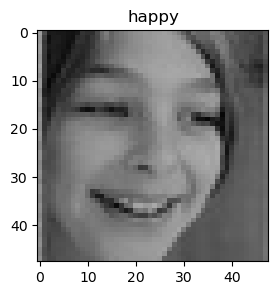

In [138]:
show_img(X_train_shuffled, y_train_shuffled, np.random.randint(0, len(X_train_shuffled)))

In [139]:
np.bincount(y_train_shuffled)

array([3171, 3171, 3171, 3171, 3171, 3171])

In [140]:
X_train_shuffled.shape

(19026, 48, 48, 3)

In [141]:
X_test_shuffled.shape

(4986, 48, 48, 3)

### Model 7

In [142]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48, 3,)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01),),
    tf.keras.layers.Dense(128, activation='relu',),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', ),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(last_layer, activation='softmax'),
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 128)       

In [143]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [144]:
epochs = 20
history = model.fit(X_train_shuffled, y_train_shuffled, 
                     epochs=epochs, batch_size=32, verbose=2, )

Epoch 1/20
595/595 - 11s - loss: 1.6503 - accuracy: 0.3038 - 11s/epoch - 19ms/step
Epoch 2/20
595/595 - 11s - loss: 1.4048 - accuracy: 0.4441 - 11s/epoch - 19ms/step
Epoch 3/20
595/595 - 77s - loss: 1.2634 - accuracy: 0.5079 - 77s/epoch - 130ms/step
Epoch 4/20
595/595 - 11s - loss: 1.1482 - accuracy: 0.5548 - 11s/epoch - 18ms/step
Epoch 5/20
595/595 - 11s - loss: 1.0409 - accuracy: 0.6087 - 11s/epoch - 19ms/step
Epoch 6/20
595/595 - 11s - loss: 0.9289 - accuracy: 0.6535 - 11s/epoch - 18ms/step
Epoch 7/20
595/595 - 136s - loss: 0.8170 - accuracy: 0.7029 - 136s/epoch - 229ms/step
Epoch 8/20
595/595 - 11s - loss: 0.6941 - accuracy: 0.7486 - 11s/epoch - 18ms/step
Epoch 9/20
595/595 - 11s - loss: 0.5818 - accuracy: 0.7945 - 11s/epoch - 18ms/step
Epoch 10/20
595/595 - 11s - loss: 0.4795 - accuracy: 0.8328 - 11s/epoch - 18ms/step
Epoch 11/20
595/595 - 17s - loss: 0.3927 - accuracy: 0.8640 - 17s/epoch - 28ms/step
Epoch 12/20
595/595 - 11s - loss: 0.3324 - accuracy: 0.8841 - 11s/epoch - 18ms/st

In [145]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

model_loss.append(loss)
model_acc.append(acc)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 3.6024935245513916, Model accuracy: 0.4909747242927551'

#### Analysis of the model training process

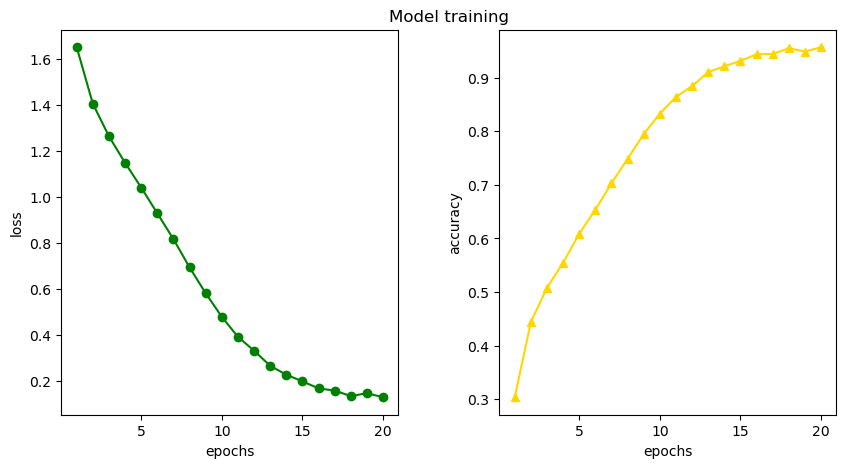

In [146]:
show_training_data()

#### Visualize predictions on an example sample

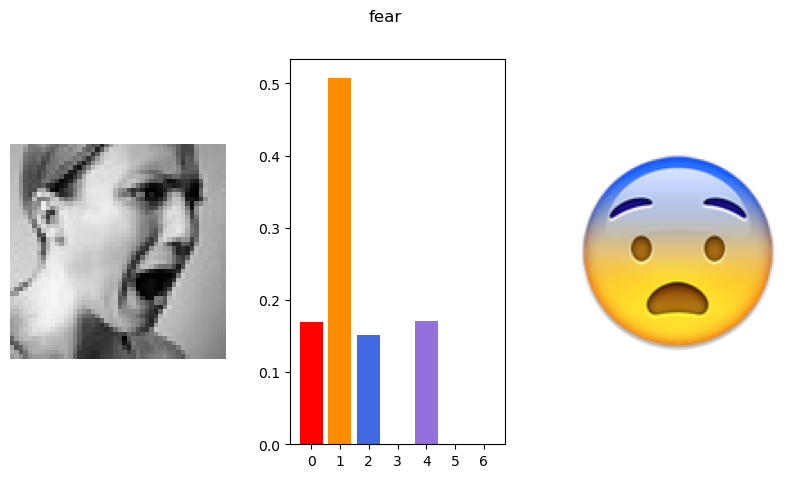

In [147]:
pred_img(X_test_shuffled)

In [148]:
X_train_shuffled, X_valid_shuffled, y_train_shuffled, y_valid_shuffled = train_test_split(X_train_shuffled, y_train_shuffled, test_size=0.2)

In [149]:
X_train_shuffled.shape

(15220, 48, 48, 3)

In [150]:
X_valid_shuffled.shape

(3806, 48, 48, 3)

### Model 8

In [151]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48, 3,)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01),),
    tf.keras.layers.Dense(128, activation='relu',),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', ),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(last_layer, activation='softmax'),
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 128)       

In [152]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [153]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

In [154]:
epochs = 30
history = model.fit(X_train_shuffled, y_train_shuffled, validation_data=(X_valid_shuffled, y_valid_shuffled),
                     epochs=epochs, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/30
476/476 - 10s - loss: 1.6761 - accuracy: 0.2854 - val_loss: 1.5474 - val_accuracy: 0.3868 - 10s/epoch - 21ms/step
Epoch 2/30
476/476 - 11s - loss: 1.4382 - accuracy: 0.4273 - val_loss: 1.3500 - val_accuracy: 0.4690 - 11s/epoch - 23ms/step
Epoch 3/30
476/476 - 12s - loss: 1.2697 - accuracy: 0.5041 - val_loss: 1.3115 - val_accuracy: 0.5045 - 12s/epoch - 26ms/step
Epoch 4/30
476/476 - 11s - loss: 1.1350 - accuracy: 0.5640 - val_loss: 1.2018 - val_accuracy: 0.5441 - 11s/epoch - 22ms/step
Epoch 5/30
476/476 - 10s - loss: 1.0022 - accuracy: 0.6218 - val_loss: 1.2092 - val_accuracy: 0.5544 - 10s/epoch - 22ms/step
Epoch 6/30
476/476 - 10s - loss: 0.8654 - accuracy: 0.6786 - val_loss: 1.1592 - val_accuracy: 0.5906 - 10s/epoch - 22ms/step
Epoch 7/30
476/476 - 10s - loss: 0.7166 - accuracy: 0.7449 - val_loss: 1.1971 - val_accuracy: 0.5862 - 10s/epoch - 22ms/step
Epoch 8/30
476/476 - 10s - loss: 0.5763 - accuracy: 0.7916 - val_loss: 1.2343 - val_accuracy: 0.6211 - 10s/epoch - 22ms/step


In [155]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

model_loss.append(loss)
model_acc.append(acc)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 4.456426620483398, Model accuracy: 0.48515844345092773'

#### Analysis of the model training process

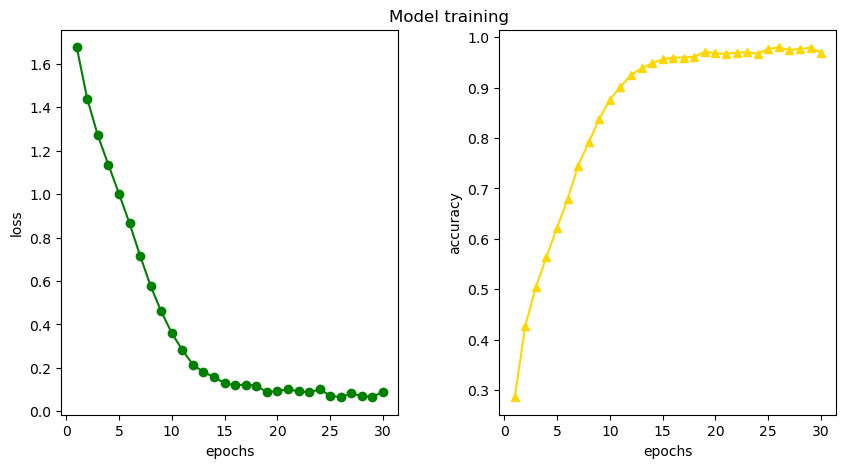

In [156]:
show_training_data()

#### Analysis of validation data used in the model training process

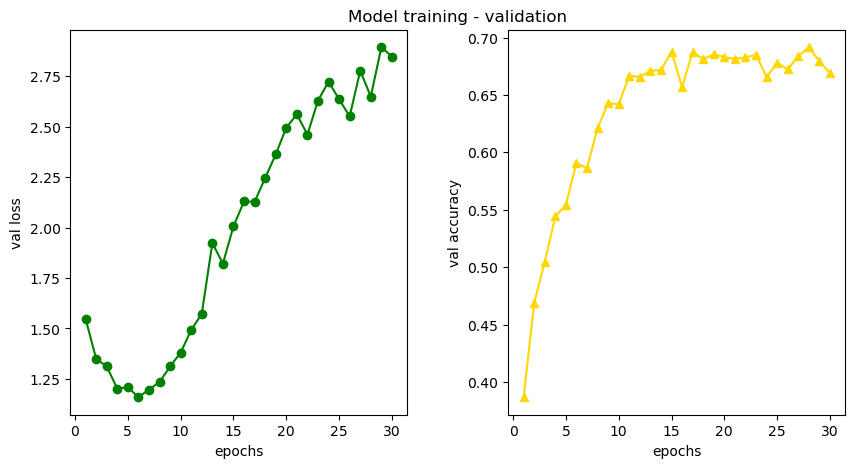

In [157]:
show_training_data_val()

#### Visualize the model's predictions on a sample sample

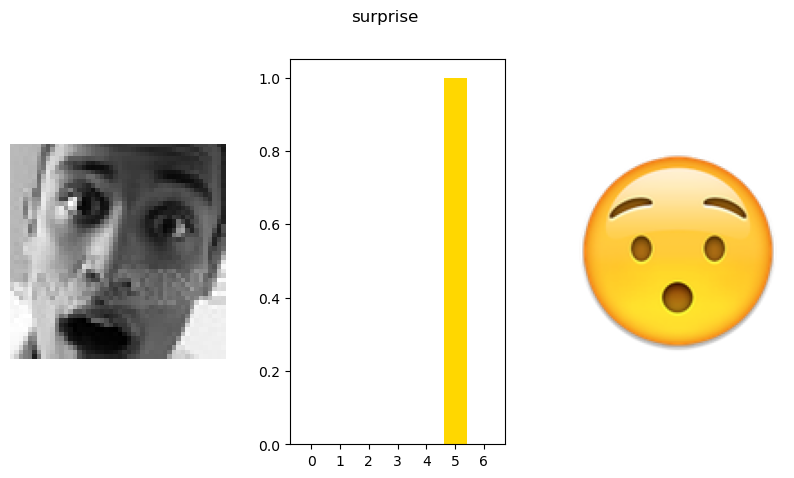

In [158]:
pred_img(X_test_shuffled)

### Model 9

#### Added BatchNormalization, L2 regularization, padding='same', kernel_initializer='he_normal' and Dropout layers

In [159]:
# Colossal model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48, 3,)),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same',
                           kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(), name='convLayer1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5, 5), activation='elu', padding='same',
                           kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3),activation='elu',padding='same',
                           kernel_initializer='he_normal',),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(7, activation='softmax'),
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convLayer1 (Conv2D)         (None, 48, 48, 32)        2432      
                                                                 
 batch_normalization_14 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_30 (Conv2D)          (None, 48, 48, 64)        51264     
                                                                 
 batch_normalization_15 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 48, 48, 128)       73856     
                                                                 
 batch_normalization_16 (Bat  (None, 48, 48, 128)     

In [160]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.0005), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [161]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

In [162]:
epochs = 20
history = model.fit(X_train_shuffled, y_train_shuffled, validation_data=(X_valid_shuffled, y_valid_shuffled),
                     epochs=epochs, batch_size=64, verbose=1, callbacks=[early_stopping])

Epoch 1/20
238/238 [==============================] - 157s 660ms/step - loss: 3.3082 - accuracy: 0.2405 - val_loss: 2.8307 - val_accuracy: 0.2606
Epoch 2/20
238/238 [==============================] - 145s 610ms/step - loss: 2.4654 - accuracy: 0.2754 - val_loss: 2.2359 - val_accuracy: 0.2714
Epoch 3/20
238/238 [==============================] - 144s 605ms/step - loss: 2.1406 - accuracy: 0.2823 - val_loss: 2.2808 - val_accuracy: 0.1910
Epoch 4/20
238/238 [==============================] - 145s 610ms/step - loss: 2.0055 - accuracy: 0.2914 - val_loss: 2.0788 - val_accuracy: 0.2696
Epoch 5/20
238/238 [==============================] - 145s 608ms/step - loss: 1.9184 - accuracy: 0.3103 - val_loss: 2.5989 - val_accuracy: 0.2063
Epoch 6/20
238/238 [==============================] - 299s 1s/step - loss: 1.8696 - accuracy: 0.3054 - val_loss: 1.8741 - val_accuracy: 0.3029
Epoch 7/20
238/238 [==============================] - 149s 625ms/step - loss: 1.8001 - accuracy: 0.3321 - val_loss: 2.0718 - va

In [163]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

model_loss.append(loss)
model_acc.append(acc)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 1.5917942523956299, Model accuracy: 0.3894905745983124'

#### Analysis of the model training process

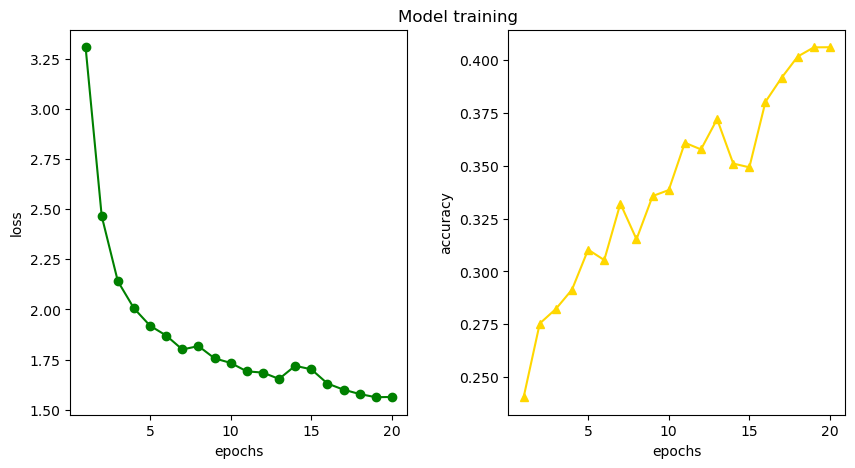

In [164]:
show_training_data()

#### Analysis of validation data used in the model training process

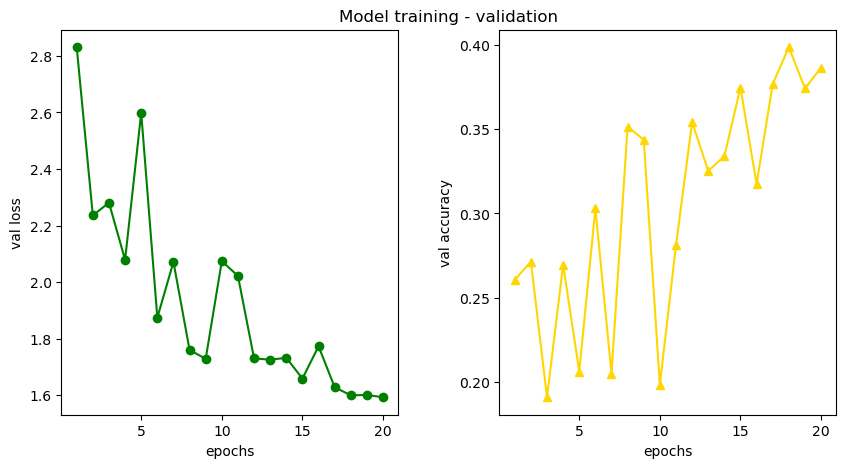

In [165]:
show_training_data_val()

#### Visualize the model's predictions on a sample sample

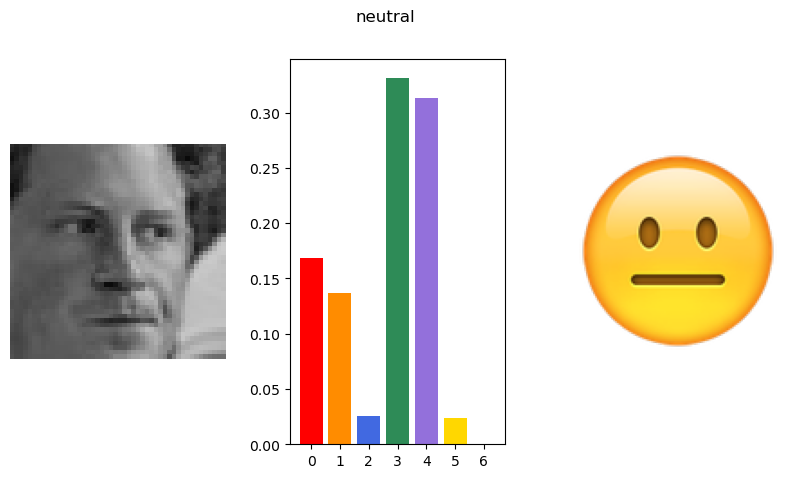

In [166]:
pred_img(X_test_shuffled)

## Budowa sieci neuronowej - bez najmniejszej klasy emocji w skali Szarości 

#### Create training data and test data

In [167]:
X_train, y_train = [], []

for mood, images in train_labels_dct.items():
    for image in images:
        img = cv2.imread(str(image))
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X_train.append(img_gray)
        y_train.append(labels_dct[mood])

In [168]:
len(X_train), len(y_train)

(19026, 19026)

In [169]:
X_test, y_test = [], []

for mood, images in test_labels_dct.items():
    for image in images:
        img = cv2.imread(str(image))
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X_test.append(img_gray)
        y_test.append(labels_dct[mood])

In [170]:
len(X_test), len(y_test)

(4986, 4986)

In [171]:
np.array(X_train).shape

(19026, 48, 48)

In [172]:
np.array(y_train).shape

(19026,)

In [173]:
np.array(X_test).shape

(4986, 48, 48)

In [174]:
np.array(y_test).shape

(4986,)

#### Data shuffle

In [175]:
combined_train = list(zip(X_train, y_train))
np.random.shuffle(combined_train)
X_train_shuffled, y_train_shuffled = zip(*combined_train)

In [176]:
combined_test = list(zip(X_test, y_test))
np.random.shuffle(combined_test)
X_test_shuffled, y_test_shuffled = zip(*combined_test)

In [177]:
X_train_shuffled = np.array(X_train_shuffled)
X_test_shuffled = np.array(X_test_shuffled)

In [178]:
X_train_shuffled = X_train_shuffled / 255
X_test_shuffled = X_test_shuffled / 255

In [179]:
y_train_shuffled = np.array(y_train_shuffled)
y_test_shuffled = np.array(y_test_shuffled)

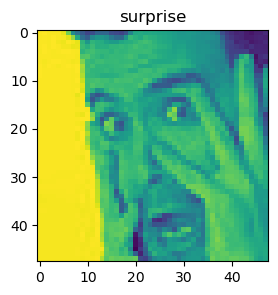

In [180]:
show_img(X_train_shuffled, y_train_shuffled, np.random.randint(0, len(X_train_shuffled)))

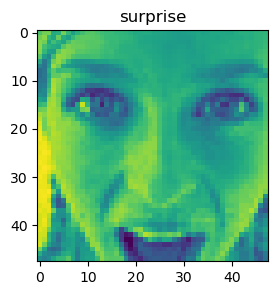

In [181]:
show_img(X_train_shuffled, y_train_shuffled, np.random.randint(0, len(X_train_shuffled)))

In [182]:
X_train_shuffled.shape

(19026, 48, 48)

### Model 10

In [183]:
# Debugging API - complex models

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(48, 48, 1)),)
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', ),)
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)),)
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', ),)
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)),)
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', ),)
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)),)

model.add(tf.keras.layers.Flatten(),)
model.add(tf.keras.layers.Dense(128, activation='relu',),)
model.add(tf.keras.layers.Dense(64, activation='relu', ),)
model.add(tf.keras.layers.Dense(last_layer, activation='softmax'),)


model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 4, 4, 128)       

In [184]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [185]:
epochs = 20
history = model.fit(X_train_shuffled, y_train_shuffled, 
                     epochs=epochs, batch_size=32, verbose=2, )

Epoch 1/20
595/595 - 11s - loss: 1.6622 - accuracy: 0.2959 - 11s/epoch - 18ms/step
Epoch 2/20
595/595 - 11s - loss: 1.4200 - accuracy: 0.4352 - 11s/epoch - 18ms/step
Epoch 3/20
595/595 - 11s - loss: 1.2781 - accuracy: 0.4996 - 11s/epoch - 18ms/step
Epoch 4/20
595/595 - 11s - loss: 1.1689 - accuracy: 0.5496 - 11s/epoch - 19ms/step
Epoch 5/20
595/595 - 11s - loss: 1.0651 - accuracy: 0.5940 - 11s/epoch - 18ms/step
Epoch 6/20
595/595 - 11s - loss: 0.9618 - accuracy: 0.6411 - 11s/epoch - 18ms/step
Epoch 7/20
595/595 - 11s - loss: 0.8502 - accuracy: 0.6865 - 11s/epoch - 18ms/step
Epoch 8/20
595/595 - 11s - loss: 0.7437 - accuracy: 0.7315 - 11s/epoch - 18ms/step
Epoch 9/20
595/595 - 11s - loss: 0.6381 - accuracy: 0.7737 - 11s/epoch - 18ms/step
Epoch 10/20
595/595 - 11s - loss: 0.5354 - accuracy: 0.8088 - 11s/epoch - 18ms/step
Epoch 11/20
595/595 - 11s - loss: 0.4485 - accuracy: 0.8442 - 11s/epoch - 18ms/step
Epoch 12/20
595/595 - 11s - loss: 0.3745 - accuracy: 0.8694 - 11s/epoch - 18ms/step
E

In [186]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

model_loss.append(loss)
model_acc.append(acc)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 3.325819730758667, Model accuracy: 0.4965904653072357'

#### Analysis of the model training process

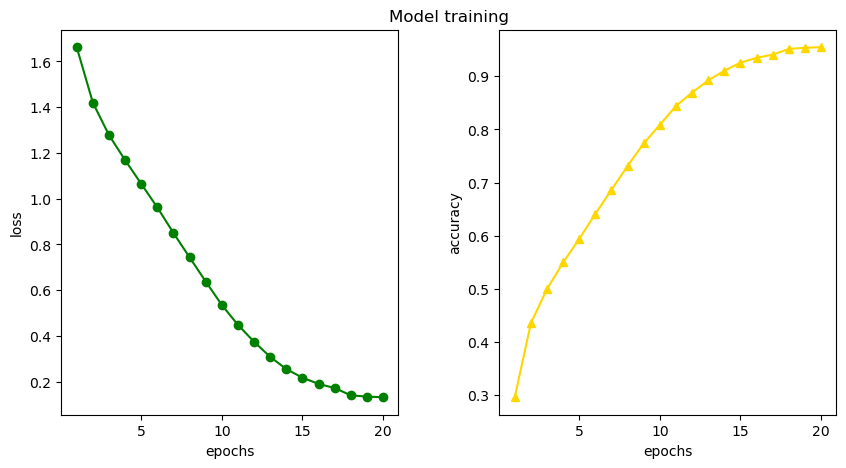

In [187]:
show_training_data()

#### Visualize predictions on an example sample

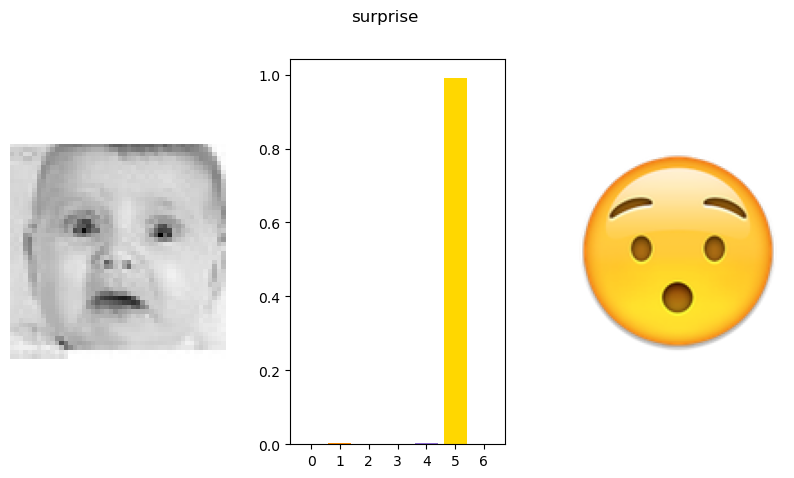

In [188]:
pred_img(X_test_shuffled, is_gray=True)

In [189]:
X_train_shuffled, X_valid_shuffled, y_train_shuffled, y_valid_shuffled = train_test_split(X_train_shuffled, y_train_shuffled, test_size=0.2)

### Model 11

In [190]:
# Functional API (bit more flexible)

inputs = tf.keras.layers.Input(shape=(48, 48, 1,))
x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', )(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', )(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', )(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu',)(x)
x = tf.keras.layers.Dense(64, activation='relu', )(x)
outputs = tf.keras.layers.Dense(last_layer, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 8, 8, 128)         7385

In [191]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [192]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

In [193]:
epochs = 30
history = model.fit(X_train_shuffled, y_train_shuffled, validation_data=(X_valid_shuffled, y_valid_shuffled),
                     epochs=epochs, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/30
476/476 - 10s - loss: 1.6977 - accuracy: 0.2740 - val_loss: 1.6101 - val_accuracy: 0.3276 - 10s/epoch - 21ms/step
Epoch 2/30
476/476 - 10s - loss: 1.4996 - accuracy: 0.3980 - val_loss: 1.4412 - val_accuracy: 0.4304 - 10s/epoch - 20ms/step
Epoch 3/30
476/476 - 10s - loss: 1.3517 - accuracy: 0.4674 - val_loss: 1.3524 - val_accuracy: 0.4601 - 10s/epoch - 20ms/step
Epoch 4/30
476/476 - 10s - loss: 1.2347 - accuracy: 0.5210 - val_loss: 1.2696 - val_accuracy: 0.5129 - 10s/epoch - 20ms/step
Epoch 5/30
476/476 - 10s - loss: 1.1244 - accuracy: 0.5706 - val_loss: 1.2538 - val_accuracy: 0.5179 - 10s/epoch - 20ms/step
Epoch 6/30
476/476 - 10s - loss: 1.0212 - accuracy: 0.6188 - val_loss: 1.2184 - val_accuracy: 0.5570 - 10s/epoch - 20ms/step
Epoch 7/30
476/476 - 11s - loss: 0.9169 - accuracy: 0.6625 - val_loss: 1.2428 - val_accuracy: 0.5699 - 11s/epoch - 22ms/step
Epoch 8/30
476/476 - 11s - loss: 0.8123 - accuracy: 0.7034 - val_loss: 1.1979 - val_accuracy: 0.5891 - 11s/epoch - 24ms/step


In [194]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

model_loss.append(loss)
model_acc.append(acc)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 4.286498069763184, Model accuracy: 0.48215001821517944'

#### Analysis of the model training process

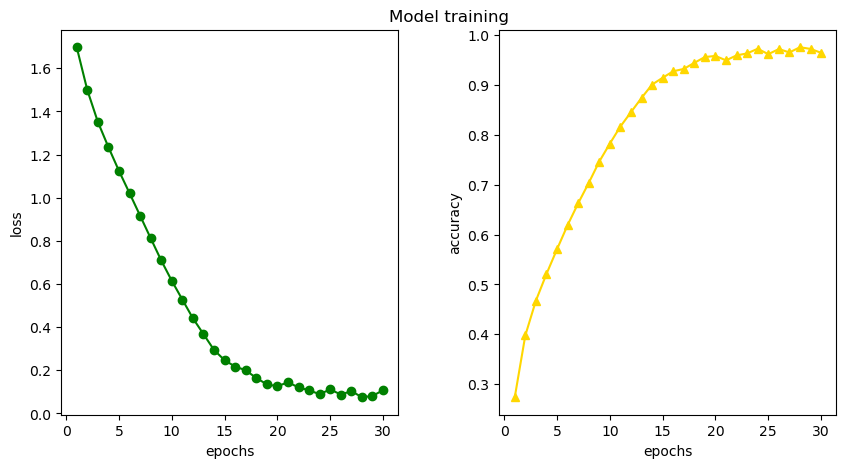

In [195]:
show_training_data()

#### Visualize predictions on an example sample

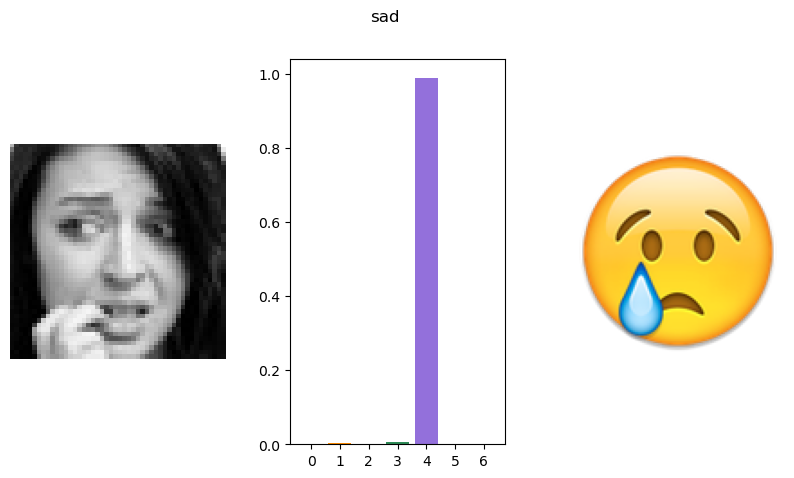

In [196]:
pred_img(X_test_shuffled, )

### Model 12

#### Added BatchNormalization, L2 regularization, padding='same', kernel_initializer='he_normal' and Dropout layers

In [197]:
# Colossal model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48, 1,)),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same',
                           kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(), name='convLayer1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5, 5), activation='elu', padding='same',
                           kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3),activation='elu',padding='same',
                           kernel_initializer='he_normal',),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(7, activation='softmax'),
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convLayer1 (Conv2D)         (None, 48, 48, 32)        832       
                                                                 
 batch_normalization_18 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_38 (Conv2D)          (None, 48, 48, 64)        51264     
                                                                 
 batch_normalization_19 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 48, 48, 128)       73856     
                                                                 
 batch_normalization_20 (Bat  (None, 48, 48, 128)     

In [198]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.0005), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [199]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

In [200]:
epochs = 20
history = model.fit(X_train_shuffled, y_train_shuffled, validation_data=(X_valid_shuffled, y_valid_shuffled),
                     epochs=epochs, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/20
476/476 [==============================] - 151s 316ms/step - loss: 3.1067 - accuracy: 0.1988 - val_loss: 2.5401 - val_accuracy: 0.1926
Epoch 2/20
476/476 [==============================] - 147s 308ms/step - loss: 2.2388 - accuracy: 0.2144 - val_loss: 2.4900 - val_accuracy: 0.1813
Epoch 3/20
476/476 [==============================] - 152s 320ms/step - loss: 2.0554 - accuracy: 0.2141 - val_loss: 1.9923 - val_accuracy: 0.2068
Epoch 4/20
476/476 [==============================] - 147s 309ms/step - loss: 1.9336 - accuracy: 0.2186 - val_loss: 2.7458 - val_accuracy: 0.1852
Epoch 5/20
476/476 [==============================] - 155s 325ms/step - loss: 1.9226 - accuracy: 0.2309 - val_loss: 1.9156 - val_accuracy: 0.2136
Epoch 6/20
476/476 [==============================] - 165s 348ms/step - loss: 1.8516 - accuracy: 0.2547 - val_loss: 1.7999 - val_accuracy: 0.2796
Epoch 7/20
476/476 [==============================] - 158s 332ms/step - loss: 1.7989 - accuracy: 0.2754 - val_loss: 1.7808 -

In [201]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

model_loss.append(loss)
model_acc.append(acc)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 1.676032304763794, Model accuracy: 0.3363417685031891'

#### Analysis of the model training process

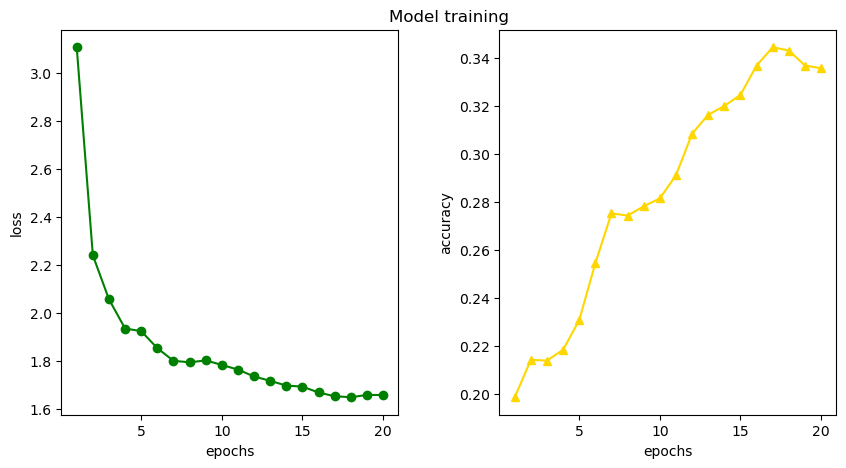

In [202]:
show_training_data()

#### Analysis of validation data used in the model training process

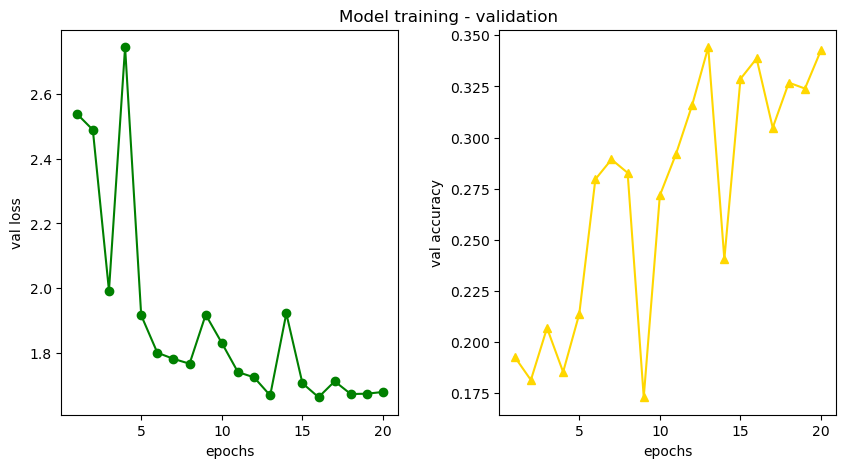

In [203]:
show_training_data_val()

#### Visualize the model's predictions on a sample sample

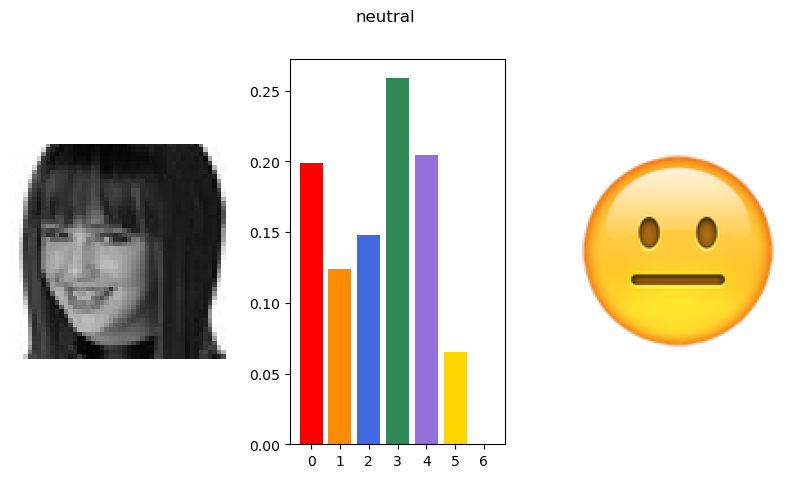

In [205]:
pred_img(X_test_shuffled, )

## The best model

In [206]:
f'Highest accuracy - model no.: {np.argmax(model_acc) + 1} - value: {model_acc[np.argmax(model_acc)]}'

'Highest accuracy - model no.: 10 - value: 0.4965904653072357'

### Re-creating the model based on model no.: 10 (exploring the best model and saving it)

In [208]:
# Debugging API - complex models

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(48, 48, 1)),)
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', ),)
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)),)
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', ),)
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)),)
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', ),)
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)),)

model.add(tf.keras.layers.Flatten(),)
model.add(tf.keras.layers.Dense(128, activation='relu',),)
model.add(tf.keras.layers.Dense(64, activation='relu', ),)
model.add(tf.keras.layers.Dense(last_layer, activation='softmax'),)


model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 4, 4, 128)      

In [209]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [210]:
epochs = 20
history = model.fit(X_train_shuffled, y_train_shuffled, 
                     epochs=epochs, batch_size=32, verbose=2, )

Epoch 1/20
476/476 - 10s - loss: 1.7182 - accuracy: 0.2453 - 10s/epoch - 22ms/step
Epoch 2/20
476/476 - 10s - loss: 1.4874 - accuracy: 0.4070 - 10s/epoch - 21ms/step
Epoch 3/20
476/476 - 10s - loss: 1.3422 - accuracy: 0.4708 - 10s/epoch - 22ms/step
Epoch 4/20
476/476 - 10s - loss: 1.2338 - accuracy: 0.5212 - 10s/epoch - 22ms/step
Epoch 5/20
476/476 - 10s - loss: 1.1347 - accuracy: 0.5666 - 10s/epoch - 22ms/step
Epoch 6/20
476/476 - 10s - loss: 1.0341 - accuracy: 0.6062 - 10s/epoch - 21ms/step
Epoch 7/20
476/476 - 11s - loss: 0.9336 - accuracy: 0.6557 - 11s/epoch - 22ms/step
Epoch 8/20
476/476 - 11s - loss: 0.8438 - accuracy: 0.6947 - 11s/epoch - 23ms/step
Epoch 9/20
476/476 - 10s - loss: 0.7301 - accuracy: 0.7375 - 10s/epoch - 21ms/step
Epoch 10/20
476/476 - 10s - loss: 0.6311 - accuracy: 0.7779 - 10s/epoch - 21ms/step
Epoch 11/20
476/476 - 10s - loss: 0.5344 - accuracy: 0.8120 - 10s/epoch - 21ms/step
Epoch 12/20
476/476 - 10s - loss: 0.4464 - accuracy: 0.8422 - 10s/epoch - 21ms/step
E

In [211]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 3.2738542556762695, Model accuracy: 0.4973927140235901'

#### Analysis of the model training process

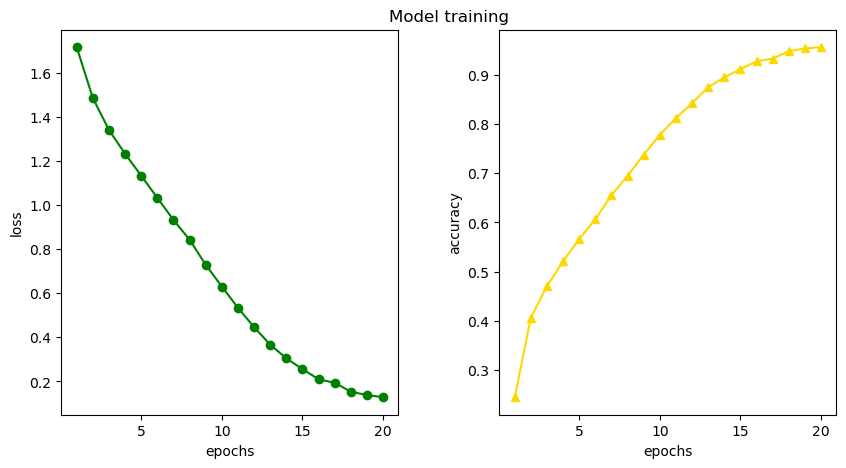

In [212]:
show_training_data()

#### Visualize the model's predictions on a sample sample

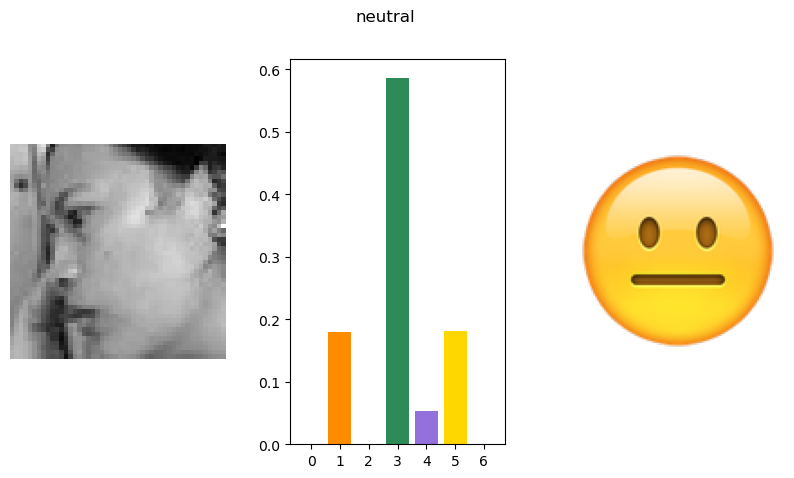

In [213]:
pred_img(X_test_shuffled)

#### Model test in external photo

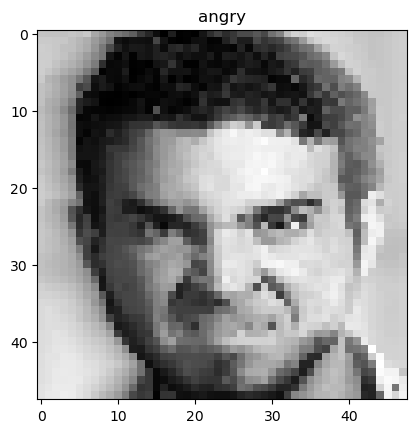

In [236]:
a = cv2.imread('1.jpg')
c = cv2.resize(a, (48, 48))
b = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
plt.imshow(b, cmap='gray')

predictions = model.predict(np.expand_dims(b, axis=0), verbose=0)

plt.title(get_label_name[np.argmax(predictions)])
plt.show()

#### Save the best model

In [237]:
model.save('model10.keras')

#### Load the best model

In [238]:
loaded_model = tf.keras.saving.load_model("model10.keras")

#### Prediction based on the best model

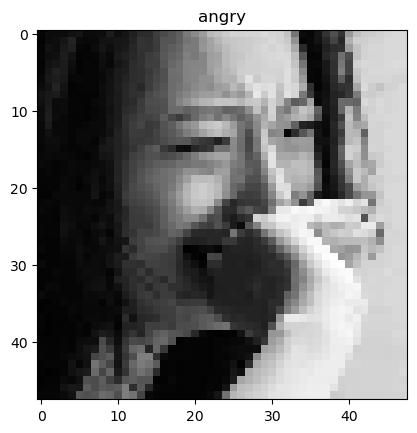

In [239]:
a = cv2.imread('2.jpg')
c = cv2.resize(a, (48, 48))
b = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
plt.imshow(b, cmap='gray')

predictions = loaded_model.predict(np.expand_dims(b, axis=0), verbose=0)

plt.title(get_label_name[np.argmax(predictions)])
plt.show()

#### An attempt to improve the best model - by adding paddings

In [249]:
# Debugging API - complex models

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(48, 48, 1)),)
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',), )
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)),)
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',),)
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)),)
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',),)
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)),)

model.add(tf.keras.layers.Flatten(),)
model.add(tf.keras.layers.Dense(128, activation='relu',),)
model.add(tf.keras.layers.Dense(64, activation='relu', ),)
model.add(tf.keras.layers.Dense(last_layer, activation='softmax'),)


model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 6, 6, 128)      

 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 4608)              0         
                                                                 
 dense_44 (Dense)            (None, 128)               589952    
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 7)                 455       
                                                                 
Total params: 691,335
Trainable params: 691,335
Non-trainable params: 0
_________________________________________________________________


In [250]:
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [251]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

In [253]:
epochs = 20
history = model.fit(X_train_shuffled, y_train_shuffled, 
                     epochs=epochs, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/20
476/476 - 13s - loss: 1.6541 - accuracy: 0.3008 - 13s/epoch - 27ms/step
Epoch 2/20
476/476 - 14s - loss: 1.4364 - accuracy: 0.4295 - 14s/epoch - 28ms/step
Epoch 3/20
476/476 - 13s - loss: 1.2662 - accuracy: 0.5069 - 13s/epoch - 28ms/step
Epoch 4/20
476/476 - 13s - loss: 1.1318 - accuracy: 0.5704 - 13s/epoch - 26ms/step
Epoch 5/20
476/476 - 13s - loss: 0.9837 - accuracy: 0.6323 - 13s/epoch - 27ms/step
Epoch 6/20
476/476 - 13s - loss: 0.8214 - accuracy: 0.6996 - 13s/epoch - 27ms/step
Epoch 7/20
476/476 - 13s - loss: 0.6773 - accuracy: 0.7548 - 13s/epoch - 26ms/step
Epoch 8/20
476/476 - 13s - loss: 0.5165 - accuracy: 0.8200 - 13s/epoch - 26ms/step
Epoch 9/20
476/476 - 13s - loss: 0.3848 - accuracy: 0.8692 - 13s/epoch - 26ms/step
Epoch 10/20
476/476 - 13s - loss: 0.2881 - accuracy: 0.9047 - 13s/epoch - 27ms/step
Epoch 11/20
476/476 - 14s - loss: 0.2128 - accuracy: 0.9289 - 14s/epoch - 29ms/step
Epoch 12/20
476/476 - 13s - loss: 0.1760 - accuracy: 0.9419 - 13s/epoch - 27ms/step
E

In [254]:
loss, acc = model.evaluate(X_test_shuffled, np.array(y_test_shuffled), verbose=0)

f'Model loss: {loss}, Model accuracy: {acc}'

'Model loss: 3.7600975036621094, Model accuracy: 0.5018050670623779'

#### Analysis of the model training process

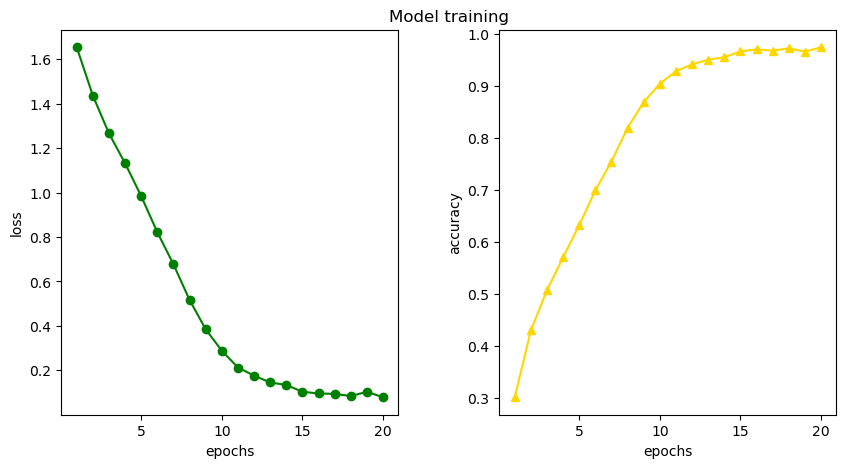

In [257]:
show_training_data()